# Demo Notebook!

Important Notes:

- For correct work clone this repo with ```--recurse-submodules```, as it uses submodules.

- Requirements list placed in submodule ```model/DFINE/requirements.txt```

- If you face with Error ```Key Error: _pymodule```, we recommend set venv as jupyter kernel via command: ```ipython kernel install --user --name=.venv```. Otherwise, jupyter will not work correctly with modules and libraries.


In [23]:
import torch
from PIL import Image
import matplotlib.pyplot as plt

from pathlib import Path

from src.plate.detector import PlateDetector
from src.plate.recognizer import PlateRecognizer
from src.plate.plate import Plate, draw_plate

# Display function

In [24]:
def show_image(img, caption, size=(10,5)):
	plt.figure(figsize=size)
	plt.imshow(img)
	plt.title(caption, fontsize=25)
	plt.axis('off')
	plt.show()

# Load Models

### Models checkpoints you can find here: [Google Drive](https://drive.google.com/drive/folders/1ewKrJnHvtHA-jff5eFnEEeASRpYXHZN2?usp=sharing).

In [25]:
def prepare_detector(thresh: float, checkpoint) -> PlateDetector:
	device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
	# Config file for the model
	config = Path("model/DFINE/configs/dfine/custom/plate_detection_n.yml")
	# Load and Create model
	detector = PlateDetector(config, checkpoint, device, thresh)
	return detector


checkpoint = Path("detector_chkpt.pth")
detector = prepare_detector(thresh=0.7, checkpoint=checkpoint)

In [26]:
def prepare_recognizer(thresh: float, checkpoint=checkpoint) -> PlateRecognizer:
	device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
	# Config file for the model
	config = Path("model/DFINE/configs/dfine/custom/plate_recognition_n.yml")
	# Load and Create model
	recognizer = PlateRecognizer(config, checkpoint, device, thresh) 
	return recognizer

checkpoint = Path("recognizer_chkpt.pth")
recognizer = prepare_recognizer(thresh=0.7, checkpoint=checkpoint)

# Load Image
### Choose your own image or demo image from `data\demo`.

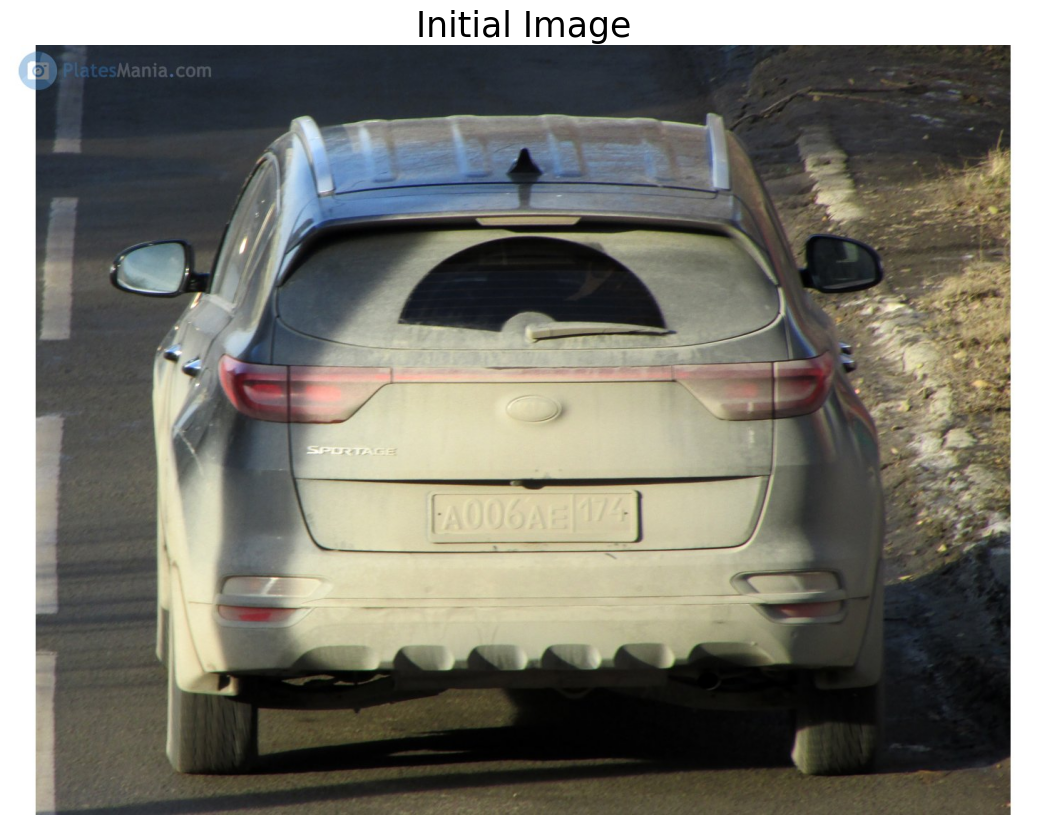

In [31]:
file = Path("data/demo/26491443.jpg")
image = Image.open(file).convert("RGB")
show_image(image, "Initial Image", size=(20,10))

# Detect Plate
### First step is to detect the plate with first Detector model

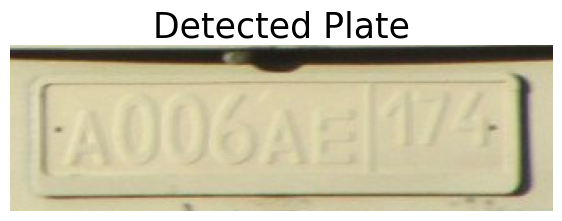

In [32]:
plate = detector(image)
if not plate:
	print("No plate on the image!")
else:
	plate_image = image.crop(plate.coords())
	show_image(plate_image, "Detected Plate", size=(7,3))

# Recognize Numbers 
### Second step is to detect letters and numbers of the license plate

In [33]:
try:
	symbols = recognizer(plate_image)
	print("Extracted number:", symbols)
except NameError:
		print("No plate on the image!")

Extracted number: [A, 0, 0, 6, A, E, 1, 7, 4]


# Combine everything into one shot

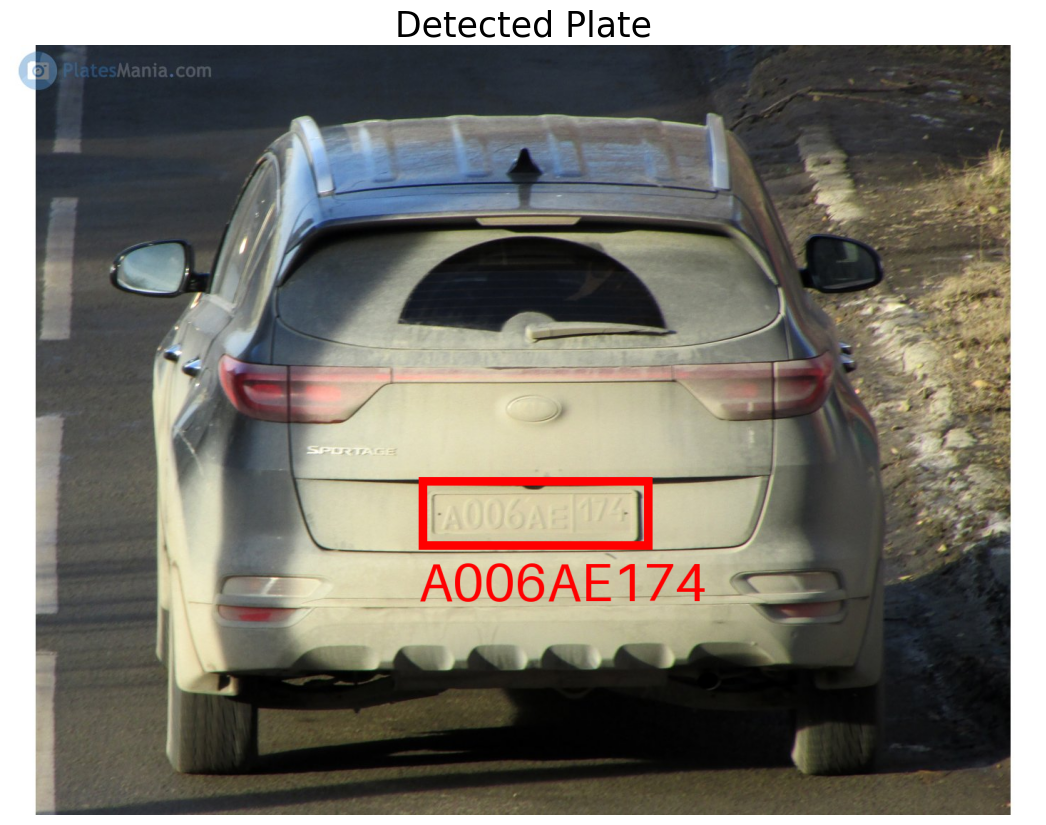

In [34]:
try:
	result = image.copy()
	plate = Plate(plate, symbols)
	draw_plate(result, plate)
	show_image(result, "Detected Plate", size=(20,10))
except NameError:
		print("No plate on the image!")